<a href="https://colab.research.google.com/github/MashaYakus/ML_Lab0/blob/main/YK_ML_Lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Якушкина Мария 407

# Лабораторная работа 0

##Data Mining и исследование данных


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Машинное обучение плотно проникло во все сферы нашей жизни, даже в медицину. Сейчас существует большое количество моделей, которые помогают врачам с изучением результатов обследований (например, поиск поражений легких на снимках кт, поиск переломов на рентген-снимках итд) и с постановкой диагнозов. Я тоже хочу попробовать связать МЛ с медицинской диагностикой.


## Постановка задачи

Имеется датасет с информацией о пациентах США. Нужно выявить пациентов подверженных инсульту

In [ ]:
df = pd.read_csv('brain_stroke.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.shape

(4981, 11)

## Описание датасета

1. gender - пол
2. age - возраст
3. hypertension - наличие гипертонии
4. heart_disease - наличие заболеваний сердца
5. ever_married - состоял ли в браке
6. work_type - тип работы
7. Residence_type - местность проживания
8. avg_glucose_level - средний уровень глюкозы 
9. bmi - индекс массы тела
10. smoking_status - употребление табака
11. **stroke** - Таргет, был ли инсульт у пациента


In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
target = 'stroke'
categorical_features = [feat for feat in list(df.columns) if feat != target and feat not in numerical_features]

## Количественные параметры


In [ ]:
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


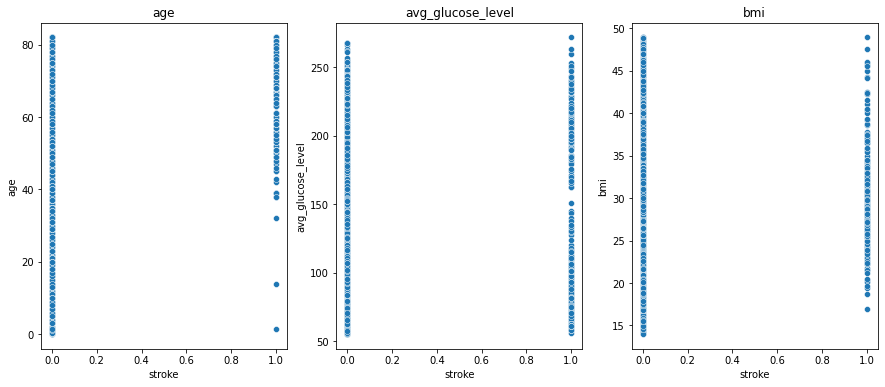

In [ ]:
plt.figure(figsize=(15, 6))

for i, feat in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[target], y=df[feat])
    plt.xlabel(str(target))
    plt.title(str(feat))

plt.show()

Из графиков видно, что шанс получить инсульт зависит от возраста: до 40 лет инсульт пациентов является единичныи случаями

От среднего же уровня глюкозы и индекса массы тела закономерностей не видно


## Категориальные параметры

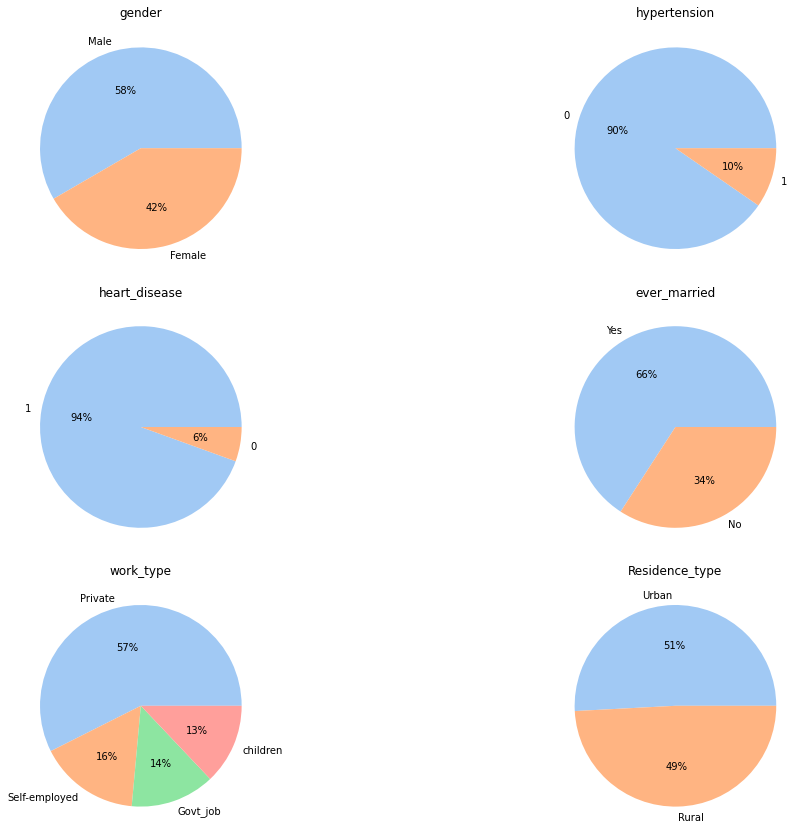

In [ ]:
plt.figure(figsize=(15, 35))
colors = sns.color_palette('pastel')

for i in range(0, len(categorical_features)-1, 2):
    plt.subplot(9, 2, i+1)
    plt.pie(x=df[categorical_features[i]].value_counts(), labels=df[categorical_features[i]].unique(), colors=colors, autopct='%.0f%%')
    plt.title(str(categorical_features[i]))
    plt.subplot(9, 2, i+2)
    plt.pie(x=df[categorical_features[i+1]].value_counts(), labels=df[categorical_features[i+1]].unique(), colors=colors, autopct='%.0f%%')
    plt.title(str(categorical_features[i+1]))

plt.tight_layout()
plt.show()


Из полученных графиков видно, что:
*   гипертонией страдают 10% отпрошенных
*   заболеваниями сердца 94% 
* в браке состояло 2/3
* больше половины работают в частном бизнесе
* распределение жилья в городской и сельской местности отличаются на 2%





## Таргет

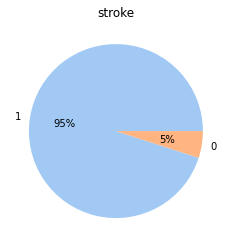

In [ ]:
plt.pie(x=df[target].value_counts(), labels=df[target].unique(), colors=colors, autopct='%.0f%%')
plt.title(target)
plt.show()

Классы очень несбалансированные. Имеем соотношение 95/5. Это нужно будет учитывать в дальнейшем.

Посмотрим на корреляционную матрицу:

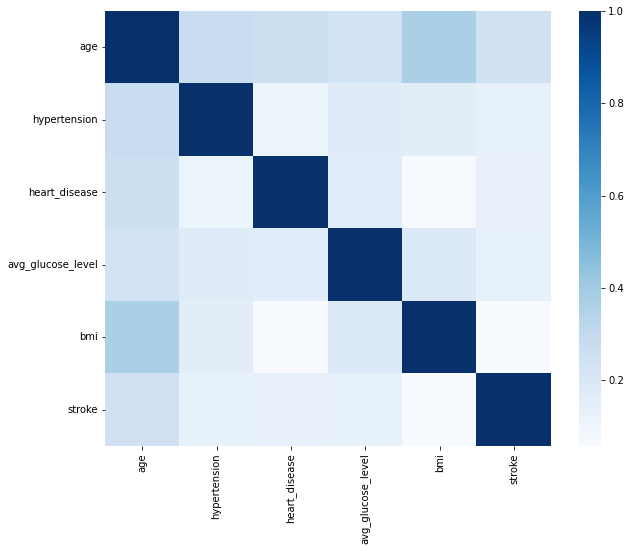

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.28,0.26,0.24,0.37,0.25
hypertension,0.28,1.00,0.11,0.17,0.16,0.13
heart_disease,0.26,0.11,1.00,0.17,0.06,0.13
avg_glucose_level,0.24,0.17,0.17,1.00,0.19,0.13
bmi,0.37,0.16,0.06,0.19,1.00,0.06
stroke,0.25,0.13,0.13,0.13,0.06,1.00



* Возраст сильно коррелирует с остальными параметрами, что логично. Из этих параметров больше всего коррелирует ИМТ
* Таргет тоже довольно сильно коррелирует с возрастом, но не с ИМТ
* Таргет также коррелирует от гипортенией и заболеваниями сердца. Гипортения и заболевания сердца тоже коррелируют между собой, что означает, что болеющим одной из болезней хорошо бы провериться на остальные


## Вывод
Я убедилась, что целевая переменная зависит от имеющихся признаков. Следовательно, у нас есть все шансы получить хорошую модель.